In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from scipy.stats import mode, norm

### ANIMATAION 관련 ###
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [132]:
# @jit(nopython = True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

def RK4_vec(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


# @jit(nopython = True)
def Non_uniform_osc(theta,t,omega,a):
    dtheta = omega - a*np.sin(theta)
    return dtheta

In [107]:
# theta_random = np.random.uniform(-np.pi, np.pi, size=N)
t = np.arange(0,30,0.1)
sol = RK4(Non_uniform_osc,0,t, args=(-1,-1.1))
# theta_s = sol[:,:N]
# Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]

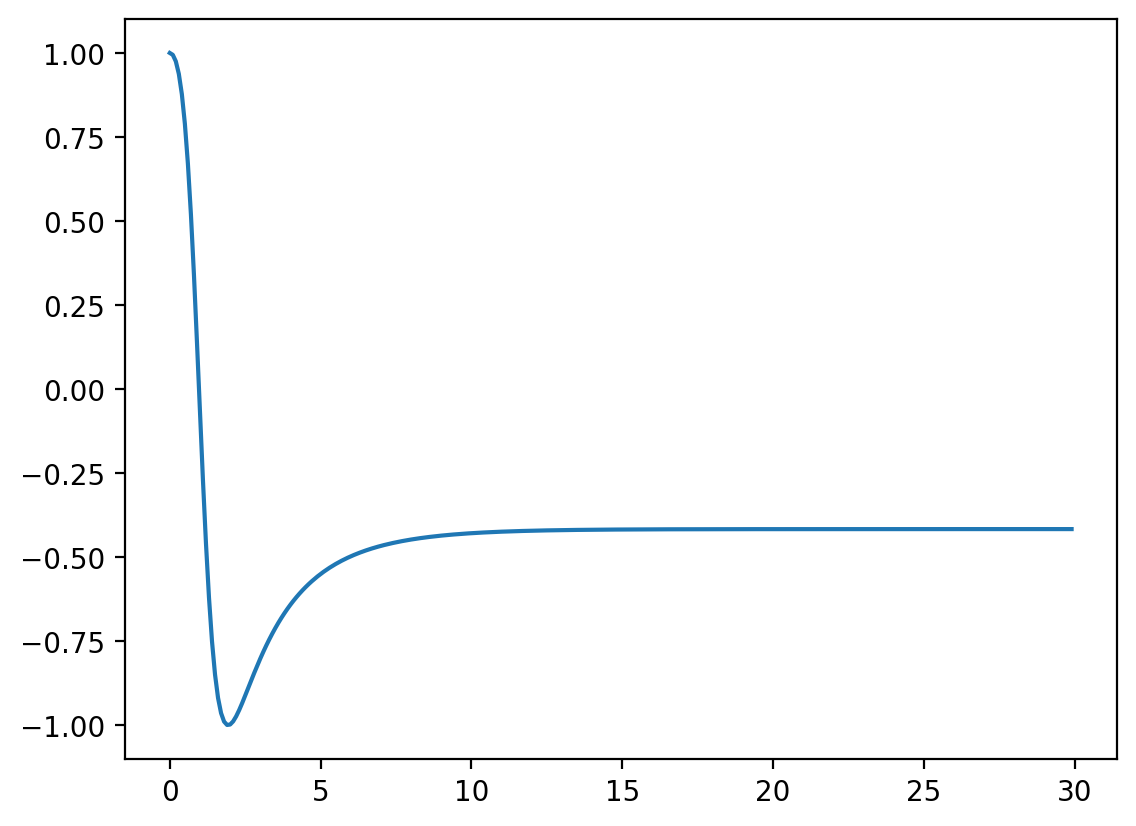

In [108]:
plt.plot(t,np.cos(sol))

(-1.2, 1.2, -1.2, 1.2)

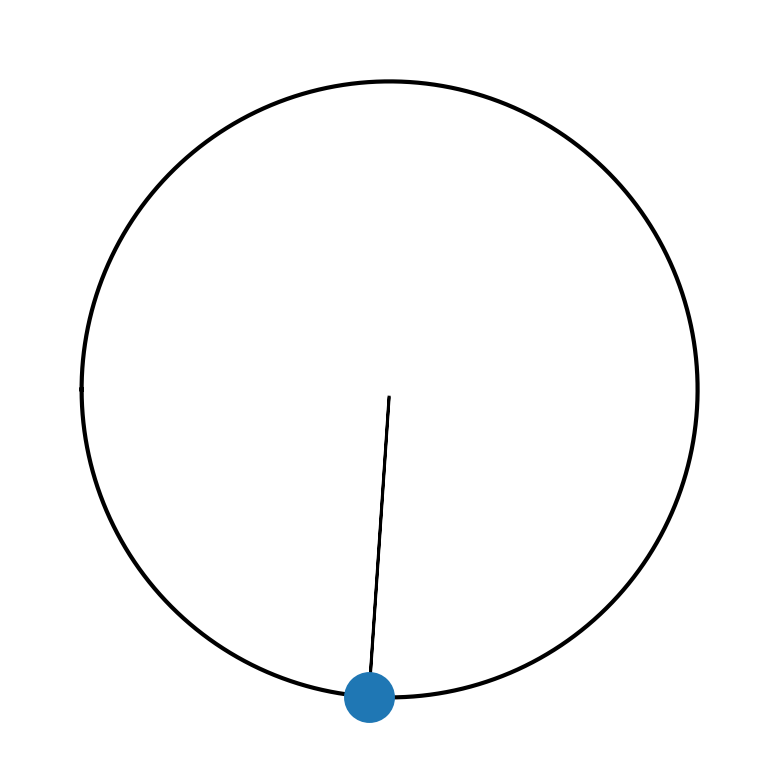

In [109]:
c_ = np.linspace(-np.pi,np.pi,10000)
fig, ax =  plt.subplots(1)
# plt.plot(np.cos(c_),np.sin(c_))
plt.gca().set_aspect('equal')

j = 10
length = 0.2
head = 0.05
ax.plot(np.cos(c_),np.sin(c_),color='black')
ax.arrow(0,0,np.cos(sol[j]),np.sin(sol[j]),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc='k', ec='k')
ax.scatter(np.cos(sol[j]),np.sin(sol[j]),s=300,zorder=3)

ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

In [110]:
def to_animation(idx):
    ax.clear()
    ax.plot(np.cos(c_),np.sin(c_),color='black')
    
    ax.arrow(0,0,np.cos(sol[idx]),np.sin(sol[idx]),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc='k', ec='k')
    ax.scatter(np.cos(sol[idx]),np.sin(sol[idx]),s=300,zorder=3)
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

In [111]:
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(0,300,2)
ani = FuncAnimation(fig,to_animation,frames=idxs,interval=50)

In [112]:
# 저장이 필요할 경우
ani.save(f'Sattle down animation.mp4',dpi=400)

In [113]:
# 확인용
HTML(ani.to_html5_video())

# Over damped

In [194]:

def Over_damped(Theta,t,m,b):
    theta,dtheta =Theta
    ddtheta = 1/m*(-b*dtheta - theta)
    return np.array([dtheta,ddtheta])

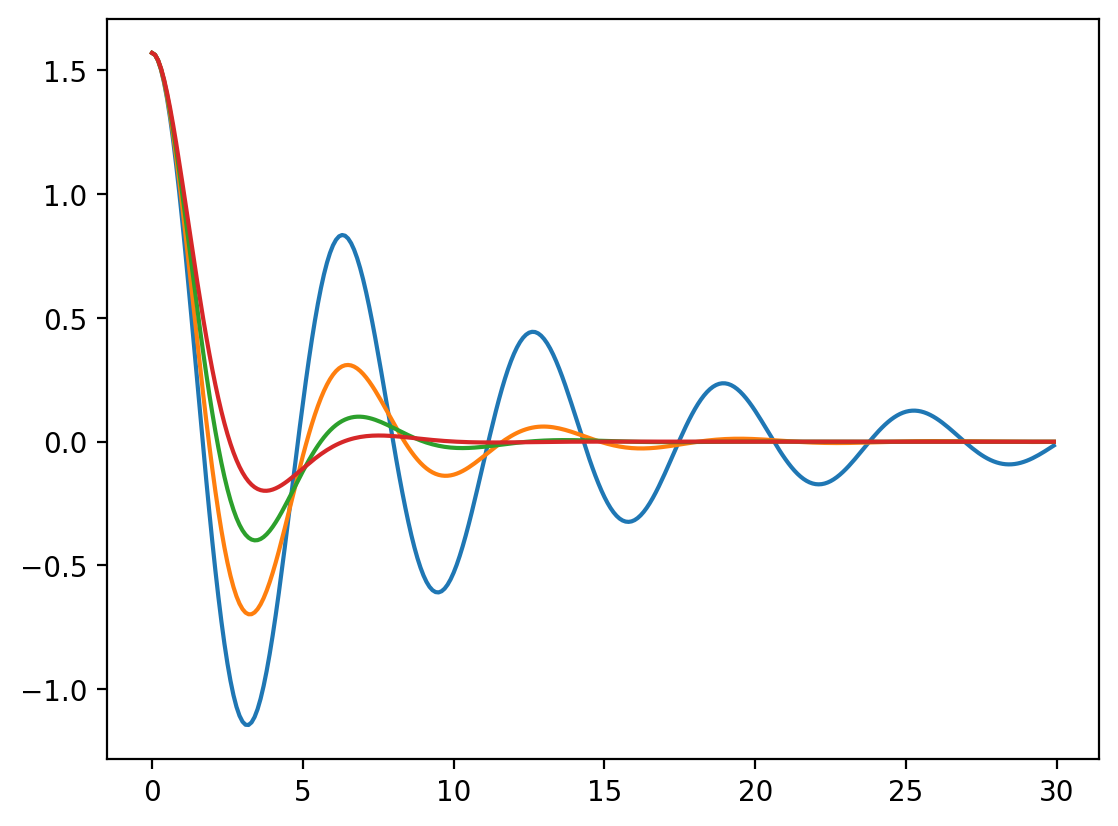

In [227]:
# theta_random = np.random.uniform(-np.pi, np.pi, size=N)
t = np.arange(0,30,0.1)
bs = [0.2,0.5,0.8,1.1]
b_thetas = []
for b in bs:
    sol = RK4_vec(Over_damped,np.array([np.pi/2,0]),t, args=(1,b))
    plt.plot(t,sol[:,0],label=f'b={b}')
    b_thetas.append(sol[:,0])

# theta_s = sol[:,:N]
# Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]

(-1.2, 1.2, -1.2, 1.2)

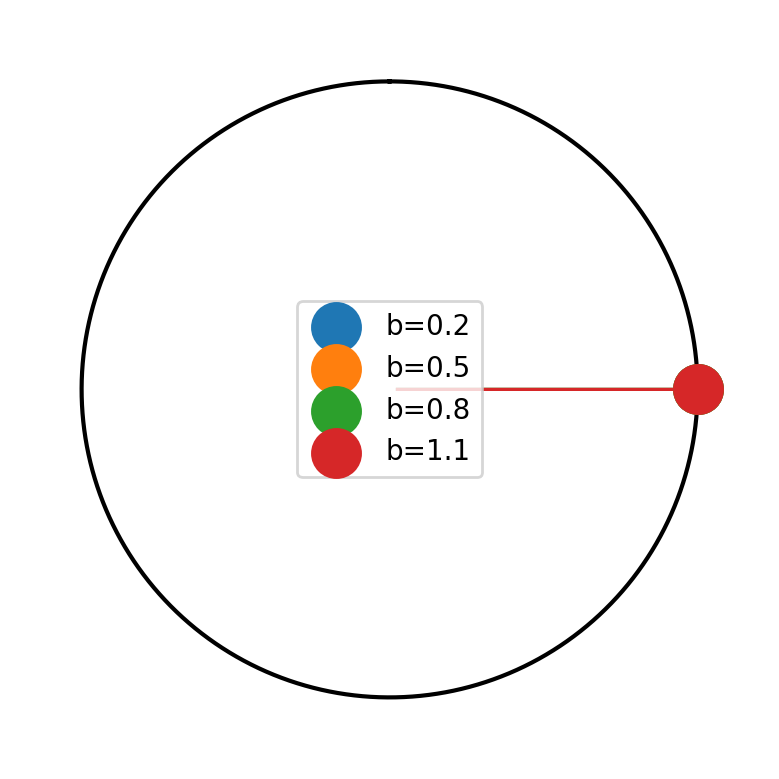

In [228]:
c_ = np.linspace(-np.pi,np.pi,10000)
fig, ax =  plt.subplots(1)
# plt.plot(np.cos(c_),np.sin(c_))
plt.gca().set_aspect('equal')

j = 0
length = 0.2
head = 0.05
ax.plot(np.sin(c_),-np.cos(c_),color='black')
colors = ['tab:blue','tab:orange','tab:green','tab:red']

for b,theta_s,color in zip(bs,b_thetas,colors):
    ax.arrow(0,0,np.sin(theta_s[j]),-np.cos(theta_s[j]),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc=color, ec=color)
    ax.scatter(np.sin(theta_s[j]),-np.cos(theta_s[j]),s=300,zorder=3,color=color,label=f'b={b}')

ax.legend()
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

In [229]:
def to_animation(idx):
    ax.clear()
    ax.plot(np.sin(c_),-np.cos(c_),color='black')
    colors = ['tab:blue','tab:orange','tab:green','tab:red']
    for b,theta_s,color in zip(bs,b_thetas,colors):
        ax.arrow(0,0,np.sin(theta_s[idx]),-np.cos(theta_s[idx]),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc=color, ec=color)
        ax.scatter(np.sin(theta_s[idx]),-np.cos(theta_s[idx]),s=300,zorder=3,color=color,label=f'b={b}')

    ax.legend()
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

In [230]:
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(0,300,2)
ani = FuncAnimation(fig,to_animation,frames=idxs,interval=50)

In [231]:
# 저장이 필요할 경우
ani.save(f'Over_damped.mp4',dpi=400)

In [232]:
# 확인용
HTML(ani.to_html5_video())

# Phase portraits

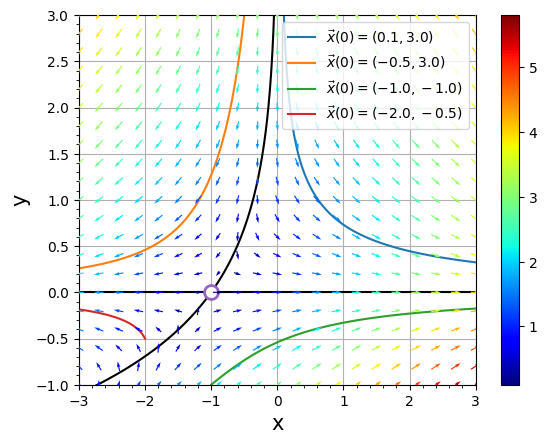

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def myFun(u,t=0):
	x,y = u[0],u[1]
	dx = x+ np.exp(-y)
	dy = -y
	return (dx,dy)



u0 = [0.1,3]
t = np.linspace(0,100,3000)
u0s = [[0.1,3],[-0.5,3],[-1,-1],[-2,-0.5]]
for u0 in u0s:
	u = odeint(myFun,u0,t)
	plt.plot(u[:,0],u[:,1],lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

x = np.linspace(-3,3,21)
y = np.linspace(-1,3,21)
X,Y = np.meshgrid(x,y)
U,V = myFun([X,Y])
M = (np.hypot(U,V))
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);


xs = np.linspace(-3,-1e-5,1000)

plt.axhline(0,color='black')
plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(X,Y,U,V,M,pivot='mid',cmap='jet',zorder=3)
plt.colorbar()
plt.xlim(-3,3)
plt.ylim(-1,3)
ax =plt.gca()
ax.grid(True)
ax.minorticks_on()
plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\3547537170.py:8: RuntimeWarning: overflow encountered in double_scalars
  dx = -x+x**3
C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\3547537170.py:8: RuntimeWarning: invalid value encountered in double_scalars
  dx = -x+x**3
C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\3547537170.py:47: RuntimeWarning: invalid value encountered in divide
  U = U / np.sqrt(U**2 + V**2);


Text(0, 0.5, 'y')

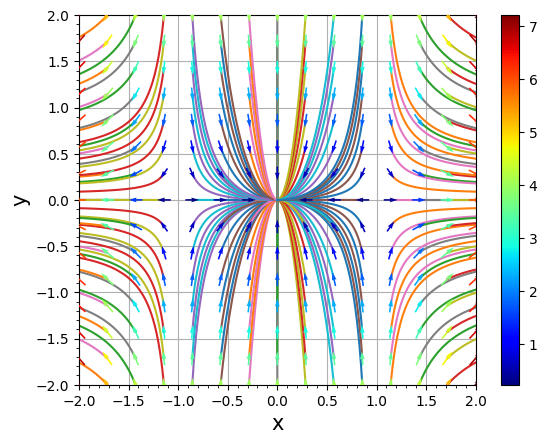

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a = 0.04
def myFun(u,t=0,a=a):
	x,y = u[0],u[1]
	dx = -x+x**3
	dy = -2*y
	return np.array([dx,dy])

def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y



u0 = [0.1,3]
t = np.arange(0,30,0.01)
x = np.linspace(-2,2,15)
y = np.linspace(-2,2,15)
X,Y = np.meshgrid(x,y)
# u0s = [[-1,0],[-0.2,0],[-0.5,-1],[0,1]]
u0s = [[x_,y_] for x_,y_ in zip(X.flatten(),Y.flatten()) ]
for u0 in u0s:
	u = RK4(myFun,np.array(u0,dtype=float),t,args=(a,))
	plt.plot(u[:,0],u[:,1],lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))


U,V = myFun([X,Y],0)
M = (np.hypot(U,V))
# U = U / np.sqrt(U**2 + V**2);
# V = V / np.sqrt(U**2 + V**2);


xs = np.linspace(-3,-1e-5,1000)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);

# plt.axhline(0,color='black')
# plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(x,y,U,V,M,pivot='mid',cmap='jet',zorder=3)
plt.colorbar()
plt.xlim(-2,2)
plt.ylim(-2,2)
ax =plt.gca()
ax.grid(True)
ax.minorticks_on()
# plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
# plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\136103607.py:8: RuntimeWarning: overflow encountered in double_scalars
  dx = -y+a*x*(x**2+y**2)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\136103607.py:9: RuntimeWarning: overflow encountered in double_scalars
  dy = x+ a*y*(x**2+y**2)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\136103607.py:8: RuntimeWarning: invalid value encountered in double_scalars
  dx = -y+a*x*(x**2+y**2)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\136103607.py:9: RuntimeWarning: invalid value encountered in double_scalars
  dy = x+ a*y*(x**2+y**2)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\136103607.py:47: RuntimeWarning: invalid value encountered in divide
  U = U / np.sqrt(U**2 + V**2);


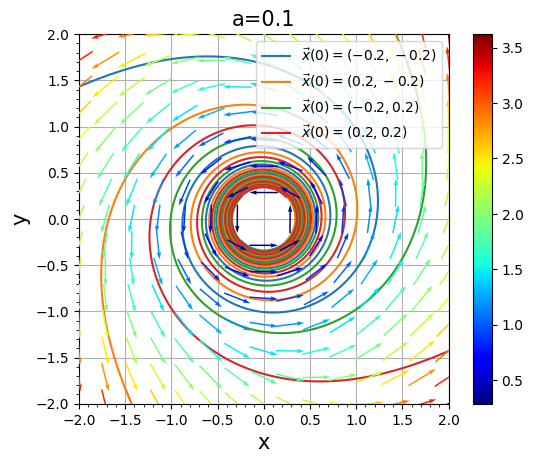

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a = 0.1
def myFun(u,t=0,a=a):
	x,y = u[0],u[1]
	dx = -y+a*x*(x**2+y**2)
	dy = x+ a*y*(x**2+y**2)
	return np.array([dx,dy])

def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


t = np.arange(0,200,0.01)
x = 0.2* np.linspace(-1.2,1.2,2)
y = 0.2* np.linspace(-1.2,1.2,2)
X,Y = np.meshgrid(x,y)
# u0s = [[-1,0],[-0.2,0],[-0.5,-1],[0,1]]
u0s = [[x_,y_] for x_,y_ in zip(X.flatten(),Y.flatten()) ]
for u0 in u0s:
	u = RK4(myFun,np.array(u0,dtype=float),t,args=(a,))
	plt.plot(u[:,0],u[:,1],lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

x = np.linspace(-2,2,15)
y = np.linspace(-2,2,15)
X,Y = np.meshgrid(x,y)
U,V = myFun([X,Y],0)
M = (np.hypot(U,V))
# U = U / np.sqrt(U**2 + V**2);
# V = V / np.sqrt(U**2 + V**2);


xs = np.linspace(-3,-1e-5,1000)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);

# plt.axhline(0,color='black')
# plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(x,y,U,V,M,scale=13,pivot='mid',cmap='jet',zorder=3)
plt.colorbar()
plt.xlim(-2,2)
plt.ylim(-2,2)
ax =plt.gca()
ax.grid(True)
ax.minorticks_on()
ax.set_aspect(1)
# plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.title(f'a={a}',fontsize=15)
plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

C:\Users\kim9y\AppData\Local\Temp\ipykernel_2200\85690097.py:6: RuntimeWarning: invalid value encountered in divide
  U = U / np.sqrt(U**2 + V**2);


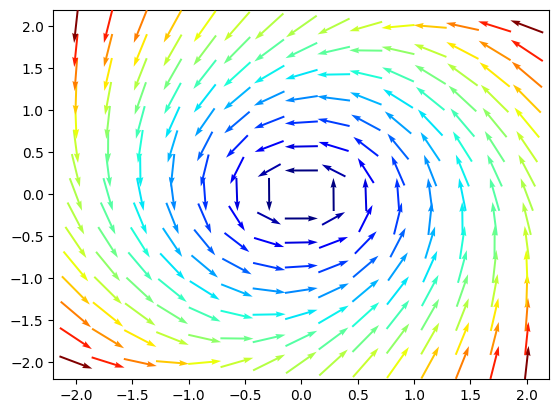

In [90]:
x = np.linspace(-2,2,15)
y = np.linspace(-2,2,15)
X,Y = np.meshgrid(x,y)
U,V = myFun([X,Y],0)
M = (np.hypot(U,V))
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);
Q = plt.quiver(x,y,U,V,M,scale=15,pivot='mid',cmap='jet',zorder=3)


In [13]:
u0
# u = RK4(myFun,np.array(u0),t,args=(a,))
np.array(u0)

array([0.1, 3. ])

<Figure size 550x700 with 0 Axes>

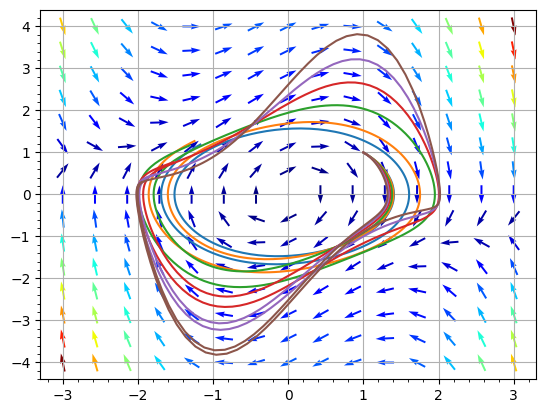

In [6]:
from numpy import *
from scipy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *


def myFun(u,t=0.,mu=.5):
	x = u[0]
	v = u[1]
	dx = v
	dv = mu*(1.-x**2)*v-x
	return (dx,dv)

t = linspace(-5.5,5.5,300)
u0 = array([1.,1.])
mu = [.1, .2, .5, 1., 1.5, 2.0]
fig = figure(figsize=(5.5,7))
plt.subplots(1,1)
ax =plt.gca()
ax.grid(True)
for m in mu:
	u = odeint(myFun,u0,t,args=(m,))
	ax.plot(u[:,0],u[:,1],lw=1.5,label=r'$\mu=%.1f$'%m)
x = linspace(-3,3,15)
y = linspace(-4,4,15)
x,y = meshgrid(x,y)
X,Y = myFun([x,y])
M = (hypot(X,Y))
M[M==0]=1.
X,Y = X/M, Y/M
ax.quiver(x,y,X,Y,M,pivot='mid',cmap=cm.jet)
ax.minorticks_on()
# ax.legend(handletextpad=0,loc='upper left')
# setp(ax.get_legend().get_texts(),fontsize=12)